In [107]:
import pandas as pd
import numpy as np
import itertools

In [108]:
pd.set_option('display.max_columns', None)

In [109]:
df = pd.read_csv('data/deadlock_matches.csv')
df

,matchid,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,5700004,The Sapphire Flame,McGinnis,Pocket,Viscous,Vindicta,Lady Geist,Kelvin,Haze,Warden,Paradox,Wraith,Abrams,Yamato
1,5700007,The Sapphire Flame,Bebop,Haze,Infernus,Viscous,Ivy,Grey Talon,Warden,Dynamo,Lady Geist,Mo & Krill,Shiv,Yamato
2,5700008,The Amber Hand,Seven,Abrams,Kelvin,Paradox,Lash,Pocket,Lady Geist,Wraith,Shiv,Ivy,Haze,Grey Talon
3,5700012,The Amber Hand,Wraith,Haze,Warden,Vindicta,Infernus,Bebop,McGinnis,Paradox,Mo & Krill,Yamato,Abrams,Seven
4,5700015,The Sapphire Flame,Warden,Infernus,Vindicta,Seven,Wraith,Abrams,Viscous,Haze,McGinnis,Pocket,Grey Talon,Bebop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,5819994,The Amber Hand,Infernus,Shiv,Mo & Krill,Warden,Bebop,Haze,Wraith,Vindicta,Seven,Dynamo,Grey Talon,Lady Geist
39082,5819996,The Sapphire Flame,Vindicta,Kelvin,Dynamo,Haze,Warden,Wraith,Viscous,Pocket,Seven,Infernus,Grey Talon,Paradox
39083,5819997,The Sapphire Flame,Lash,Bebop,Haze,Pocket,McGinnis,Dynamo,Lady Geist,Abrams,Warden,Seven,Wraith,Vindicta
39084,5819998,The Sapphire Flame,Grey Talon,Viscous,Abrams,Lash,Lady Geist,Haze,Vindicta,Kelvin,Bebop,Infernus,Ivy,Dynamo


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39086 entries, 0 to 39085
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matchid   39086 non-null  int64 
 1   winner    39086 non-null  object
 2   hero_1_A  39086 non-null  object
 3   hero_2_A  39086 non-null  object
 4   hero_3_A  39086 non-null  object
 5   hero_4_A  39086 non-null  object
 6   hero_5_A  39086 non-null  object
 7   hero_6_A  39086 non-null  object
 8   hero_1_B  39086 non-null  object
 9   hero_2_B  39086 non-null  object
 10  hero_3_B  39086 non-null  object
 11  hero_4_B  39086 non-null  object
 12  hero_5_B  39086 non-null  object
 13  hero_6_B  39086 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.2+ MB


In [111]:
df.duplicated().sum()

0

In [112]:
# replacing target values by numbers: 0 for The Amber Hand, 1 for The Sapphire Flame
df['winner'] = df['winner'].apply(lambda x: 0 if x == 'The Amber Hand' else 1)
for ch in ('A', 'B'):
    for i in range(1, 7):
        df[f'hero_{i}_{ch}'] = df[f'hero_{i}_{ch}'].str.lower()
df

,matchid,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,5700004,1,mcginnis,pocket,viscous,vindicta,lady geist,kelvin,haze,warden,paradox,wraith,abrams,yamato
1,5700007,1,bebop,haze,infernus,viscous,ivy,grey talon,warden,dynamo,lady geist,mo & krill,shiv,yamato
2,5700008,0,seven,abrams,kelvin,paradox,lash,pocket,lady geist,wraith,shiv,ivy,haze,grey talon
3,5700012,0,wraith,haze,warden,vindicta,infernus,bebop,mcginnis,paradox,mo & krill,yamato,abrams,seven
4,5700015,1,warden,infernus,vindicta,seven,wraith,abrams,viscous,haze,mcginnis,pocket,grey talon,bebop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,5819994,0,infernus,shiv,mo & krill,warden,bebop,haze,wraith,vindicta,seven,dynamo,grey talon,lady geist
39082,5819996,1,vindicta,kelvin,dynamo,haze,warden,wraith,viscous,pocket,seven,infernus,grey talon,paradox
39083,5819997,1,lash,bebop,haze,pocket,mcginnis,dynamo,lady geist,abrams,warden,seven,wraith,vindicta
39084,5819998,1,grey talon,viscous,abrams,lash,lady geist,haze,vindicta,kelvin,bebop,infernus,ivy,dynamo


In [113]:
# packing heroes into teams columns for further more comfortable calculations
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']

df['A'] = df[A_team].values.tolist()
df['B'] = df[B_team].values.tolist()

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,matchid,winner,A,B
0,5700004,1,"[mcginnis, pocket, viscous, vindicta, lady gei...","[haze, warden, paradox, wraith, abrams, yamato]"
1,5700007,1,"[bebop, haze, infernus, viscous, ivy, grey talon]","[warden, dynamo, lady geist, mo & krill, shiv,..."
2,5700008,0,"[seven, abrams, kelvin, paradox, lash, pocket]","[lady geist, wraith, shiv, ivy, haze, grey talon]"
3,5700012,0,"[wraith, haze, warden, vindicta, infernus, bebop]","[mcginnis, paradox, mo & krill, yamato, abrams..."
4,5700015,1,"[warden, infernus, vindicta, seven, wraith, ab...","[viscous, haze, mcginnis, pocket, grey talon, ..."
...,...,...,...,...
39081,5819994,0,"[infernus, shiv, mo & krill, warden, bebop, haze]","[wraith, vindicta, seven, dynamo, grey talon, ..."
39082,5819996,1,"[vindicta, kelvin, dynamo, haze, warden, wraith]","[viscous, pocket, seven, infernus, grey talon,..."
39083,5819997,1,"[lash, bebop, haze, pocket, mcginnis, dynamo]","[lady geist, abrams, warden, seven, wraith, vi..."
39084,5819998,1,"[grey talon, viscous, abrams, lash, lady geist...","[vindicta, kelvin, bebop, infernus, ivy, dynamo]"


In [114]:
# creating a dictionary that will contain all pairs of heroes and their winrates
heroes = pd.read_csv('data/heroes_stats.csv')['localized_name']
duo_winrate = {}
for i in itertools.combinations(heroes, 2):
    duo_winrate[i] = {'win': 0, 'total': 0}

A_win = df[df['winner'] == 0]
B_win = df[df['winner'] == 1]

for i in duo_winrate:
    count = 0
    for j in A_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

    count = 0
    for j in A_win['B']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

for i in duo_winrate:
    count = 0
    for j in B_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

    count = 0
    for j in B_win['B']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

In [115]:
# saving duo_winrate dictionary in txt file
open('data/duo_winrate.txt', 'w').write(str(duo_winrate))

11117

In [116]:
# displaying 15 pairs with best winrates
duo_winrate_df = pd.DataFrame.from_dict(duo_winrate).T
duo_winrate_df['winrate'] = duo_winrate_df['win'] / duo_winrate_df['total']
duo_winrate_df = duo_winrate_df.sort_values(by=['winrate'], ascending=False)
duo_winrate_df.head(15)

,,win,total,winrate
haze,seven,9460,14916,0.634218
seven,warden,5107,8116,0.629251
mcginnis,seven,6378,10175,0.626830
mo & krill,seven,3414,5503,0.620389
abrams,seven,5654,9142,0.618464
lady geist,seven,4931,8014,0.615298
kelvin,seven,4537,7391,0.613855
seven,viscous,3680,6152,0.598179
lash,seven,3542,5922,0.598109
ivy,seven,3649,6119,0.596339


In [117]:
# adding a column with synergy of heroes for each team
# synergy is summed up from the winrates of each pair in the team
def synergy(column):
    duo_winrate = ''
    for string in open('data/duo_winrate.txt', 'r').readlines():
        duo_winrate = string
    duo_winrate = eval(duo_winrate)
    column.sort()
    synergy = 0
    for pair in itertools.combinations(column, 2):
        try:
            synergy += (duo_winrate[pair]['win'] / duo_winrate[pair]['total'])
        except:
            synergy += (duo_winrate[pair[1], pair[0]]['win'] / duo_winrate[pair[1], pair[0]]['total'])
    return synergy

df['A_synergy'] = df['A'].apply(synergy)
df['B_synergy'] = df['B'].apply(synergy)
df

,matchid,winner,A,B,A_synergy,B_synergy
0,5700004,1,"[kelvin, lady geist, mcginnis, pocket, vindict...","[abrams, haze, paradox, warden, wraith, yamato]",7.336348,7.506651
1,5700007,1,"[bebop, grey talon, haze, infernus, ivy, viscous]","[dynamo, lady geist, mo & krill, shiv, warden,...",7.290499,7.388730
2,5700008,0,"[abrams, kelvin, lash, paradox, pocket, seven]","[grey talon, haze, ivy, lady geist, shiv, wraith]",7.757924,7.306609
3,5700012,0,"[bebop, haze, infernus, vindicta, warden, wraith]","[abrams, mcginnis, mo & krill, paradox, seven,...",7.324954,7.894401
4,5700015,1,"[abrams, infernus, seven, vindicta, warden, wr...","[bebop, grey talon, haze, mcginnis, pocket, vi...",7.758806,7.435360
...,...,...,...,...,...,...
39081,5819994,0,"[bebop, haze, infernus, mo & krill, shiv, warden]","[dynamo, grey talon, lady geist, seven, vindic...",7.600880,7.353798
39082,5819996,1,"[dynamo, haze, kelvin, vindicta, warden, wraith]","[grey talon, infernus, paradox, pocket, seven,...",7.377066,7.322480
39083,5819997,1,"[bebop, dynamo, haze, lash, mcginnis, pocket]","[abrams, lady geist, seven, vindicta, warden, ...",7.460330,7.935869
39084,5819998,1,"[abrams, grey talon, haze, lady geist, lash, v...","[bebop, dynamo, infernus, ivy, kelvin, vindicta]",7.545753,6.942003


In [118]:
# unpacking heroes for separate slots 
df[A_team] = df['A'].tolist()
df[B_team] = df['B'].tolist()
df.drop(['A', 'B'], axis=1, inplace=True)
df

,matchid,winner,A_synergy,B_synergy,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,5700004,1,7.336348,7.506651,kelvin,lady geist,mcginnis,pocket,vindicta,viscous,abrams,haze,paradox,warden,wraith,yamato
1,5700007,1,7.290499,7.388730,bebop,grey talon,haze,infernus,ivy,viscous,dynamo,lady geist,mo & krill,shiv,warden,yamato
2,5700008,0,7.757924,7.306609,abrams,kelvin,lash,paradox,pocket,seven,grey talon,haze,ivy,lady geist,shiv,wraith
3,5700012,0,7.324954,7.894401,bebop,haze,infernus,vindicta,warden,wraith,abrams,mcginnis,mo & krill,paradox,seven,yamato
4,5700015,1,7.758806,7.435360,abrams,infernus,seven,vindicta,warden,wraith,bebop,grey talon,haze,mcginnis,pocket,viscous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,5819994,0,7.600880,7.353798,bebop,haze,infernus,mo & krill,shiv,warden,dynamo,grey talon,lady geist,seven,vindicta,wraith
39082,5819996,1,7.377066,7.322480,dynamo,haze,kelvin,vindicta,warden,wraith,grey talon,infernus,paradox,pocket,seven,viscous
39083,5819997,1,7.460330,7.935869,bebop,dynamo,haze,lash,mcginnis,pocket,abrams,lady geist,seven,vindicta,warden,wraith
39084,5819998,1,7.545753,6.942003,abrams,grey talon,haze,lady geist,lash,viscous,bebop,dynamo,infernus,ivy,kelvin,vindicta


In [119]:
# replacing columns by particular column for every hero
# -1 - The Amber Hand (A_team)
# +1 - The Sapphire Flame (B_team)
for hero in heroes:
    df[hero] = 0
    df[hero] -= (df[A_team] == hero).any(axis=1)
    df[hero] += (df[B_team] == hero).any(axis=1)

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,matchid,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato
0,5700004,1,7.336348,7.506651,1,0,0,0,1,0,0,-1,-1,0,-1,0,1,-1,0,0,-1,-1,1,1,1
1,5700007,1,7.290499,7.388730,0,-1,1,-1,-1,-1,-1,0,1,0,0,1,0,0,0,1,0,-1,1,0,1
2,5700008,0,7.757924,7.306609,-1,0,0,1,1,0,1,-1,1,-1,0,0,-1,-1,-1,1,0,0,0,1,0
3,5700012,0,7.324954,7.894401,1,-1,0,0,-1,-1,0,0,0,0,1,1,1,0,1,0,-1,0,-1,-1,1
4,5700015,1,7.758806,7.435360,-1,1,0,1,1,-1,0,0,0,0,1,0,0,1,-1,0,-1,1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,5819994,0,7.600880,7.353798,0,-1,1,1,-1,-1,0,0,1,0,0,-1,0,0,1,-1,1,0,-1,1,0
39082,5819996,1,7.377066,7.322480,0,0,-1,1,-1,1,0,-1,0,0,0,0,1,1,1,0,-1,1,-1,-1,0
39083,5819997,1,7.460330,7.935869,1,-1,-1,0,-1,0,0,0,1,-1,-1,0,0,-1,1,0,1,0,1,1,0
39084,5819998,1,7.545753,6.942003,-1,1,1,-1,-1,1,1,1,-1,-1,0,0,0,0,0,0,1,-1,0,0,0


In [120]:
# adding a columns with total amount of basic attributes for each team
def add_heroes_attributes(df):
    heroes_stats_df = pd.read_csv('data/heroes_stats.csv')
    heroes_list = heroes_stats_df['localized_name']
    d = {k: v for k, v in zip(heroes_list, heroes_stats_df.index)}

    for ch in ('A', 'B'):
        for col in heroes_stats_df.columns[1:]:
            df[f'{ch}_total_{col}'] = 0.

    for hero in heroes_list:
        df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values.astype(float)
        df.loc[df[f'{hero}'] == 1, f'B_total_dps':f'B_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values.astype(float)
    return df
add_heroes_attributes(df)

,matchid,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,5700004,1,7.336348,7.506651,1,0,0,0,1,0,0,-1,-1,0,-1,0,1,-1,0,0,-1,-1,1,1,1,440.0,86.15,147.0,30.98,378.0,696.0,3450.0,11.0,-10.0,20.0,41.0,1.0,16.0,386.0,48.43,155.0,37.21,384.0,708.0,3250.0,11.0,0.0,0.0,42.0,0.0,18.0
1,5700007,1,7.290499,7.388730,0,-1,1,-1,-1,-1,-1,0,1,0,0,1,0,0,0,1,0,-1,1,0,1,377.0,58.00,188.0,54.30,378.0,696.0,3425.0,13.0,10.0,0.0,40.7,3.0,19.0,392.0,72.75,90.0,20.18,384.0,708.0,3650.0,12.0,0.0,0.0,41.3,1.0,18.0
2,5700008,0,7.757924,7.306609,-1,0,0,1,1,0,1,-1,1,-1,0,0,-1,-1,-1,1,0,0,0,1,0,404.0,59.38,133.0,27.85,378.0,696.0,3400.0,10.5,8.0,10.0,40.5,1.0,18.0,351.0,68.30,150.0,42.02,378.0,696.0,3400.0,11.0,0.0,0.0,41.0,1.0,19.0
3,5700012,0,7.324954,7.894401,1,-1,0,0,-1,-1,0,0,0,0,1,1,1,0,1,0,-1,0,-1,-1,1,401.0,56.80,209.0,52.86,378.0,696.0,3425.0,13.0,0.0,0.0,41.7,3.0,17.0,425.0,39.78,176.0,36.29,384.0,708.0,3450.0,11.5,8.0,25.0,42.3,0.0,17.0
4,5700015,1,7.758806,7.435360,-1,1,0,1,1,-1,0,0,0,0,1,0,0,1,-1,0,-1,1,-1,-1,0,412.0,62.08,156.0,38.15,378.0,696.0,3425.0,10.5,-2.0,0.0,41.0,0.0,17.0,406.0,59.05,205.0,44.50,378.0,696.0,3350.0,13.0,10.0,10.0,40.7,3.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,5819994,0,7.600880,7.353798,0,-1,1,1,-1,-1,0,0,1,0,0,-1,0,0,1,-1,1,0,-1,1,0,403.0,46.60,165.0,43.96,378.0,696.0,3625.0,14.0,10.0,0.0,41.5,3.0,18.0,366.0,91.00,151.0,31.20,378.0,696.0,3500.0,10.5,-2.0,0.0,40.5,1.0,17.0
39082,5819996,1,7.377066,7.322480,0,0,-1,1,-1,1,0,-1,0,0,0,0,1,1,1,0,-1,1,-1,-1,0,404.0,78.90,149.0,38.36,378.0,696.0,3400.0,12.0,-10.0,10.0,42.0,0.0,17.0,388.0,66.30,144.0,33.56,378.0,696.0,3375.0,11.5,8.0,-15.0,40.0,0.0,18.0
39083,5819997,1,7.460330,7.935869,1,-1,-1,0,-1,0,0,0,1,-1,-1,0,0,-1,1,0,1,0,1,1,0,394.0,46.05,215.0,47.12,378.0,696.0,3450.0,13.0,10.0,25.0,41.2,4.0,17.0,401.0,80.48,142.0,30.37,378.0,696.0,3450.0,9.5,-2.0,0.0,40.5,1.0,17.0
39084,5819998,1,7.545753,6.942003,-1,1,1,-1,-1,1,1,1,-1,-1,0,0,0,0,0,0,1,-1,0,0,0,360.0,81.28,113.0,27.51,378.0,696.0,3400.0,10.0,0.0,15.0,40.5,2.0,18.0,404.0,64.40,181.0,50.06,378.0,696.0,3625.0,13.0,0.0,10.0,40.7,3.0,18.0


In [121]:
df.columns

Index(['matchid', 'winner', 'A_synergy', 'B_synergy', 'abrams', 'bebop',
       'dynamo', 'grey talon', 'haze', 'infernus', 'ivy', 'kelvin',
       'lady geist', 'lash', 'mcginnis', 'mo & krill', 'paradox', 'pocket',
       'seven', 'shiv', 'vindicta', 'viscous', 'warden', 'wraith', 'yamato',
       'A_total_dps', 'A_total_bullet_damage', 'A_total_ammo', 'A_total_bps',
       'A_total_light_melee', 'A_total_heavy_melee', 'A_total_max_health',
       'A_total_health_regen', 'A_total_bullet_resist',
       'A_total_spirit_resist', 'A_total_move_speed', 'A_total_sprint_speed',
       'A_total_stamina', 'B_total_dps', 'B_total_bullet_damage',
       'B_total_ammo', 'B_total_bps', 'B_total_light_melee',
       'B_total_heavy_melee', 'B_total_max_health', 'B_total_health_regen',
       'B_total_bullet_resist', 'B_total_spirit_resist', 'B_total_move_speed',
       'B_total_sprint_speed', 'B_total_stamina'],
      dtype='object')

In [122]:
display(df.isna().sum().sum(), df.duplicated().sum())

0

0

In [123]:
df.drop('matchid', axis=1, inplace=True)

<Axes: >

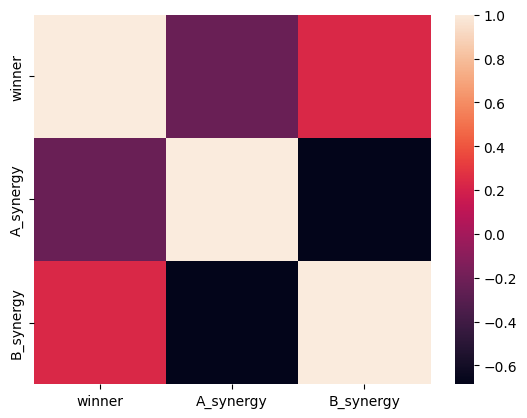

In [124]:
import seaborn as sns
to_corr = df[['winner'] + ['A_synergy', 'B_synergy']]
sns.heatmap(to_corr.corr())

<Axes: >

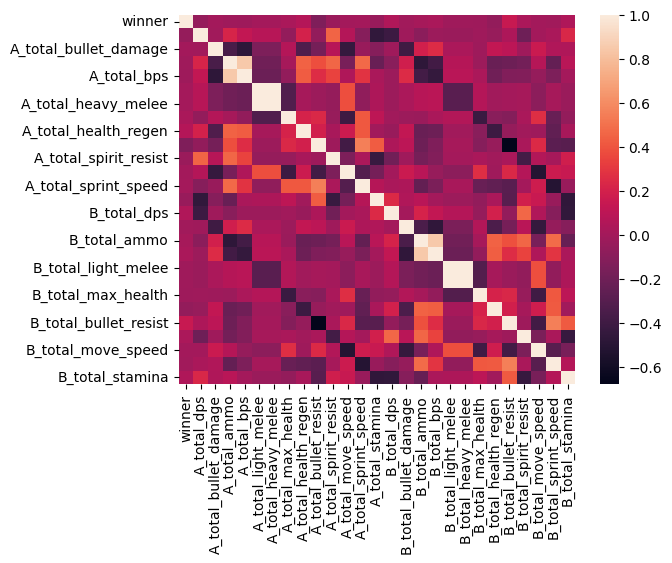

In [125]:
to_corr = df[['winner'] + list(df.loc[:, 'A_total_dps':'B_total_stamina'].columns)]
sns.heatmap(to_corr.corr())

<Axes: >

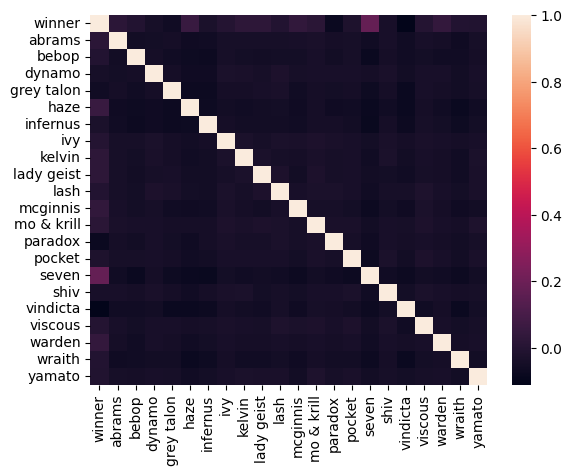

In [126]:
to_corr = df[['winner'] + list(heroes)]
sns.heatmap(to_corr.corr())

In [127]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [128]:
# splitting data for train and test pieces
X, y = df.drop('winner', axis=1), df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
X_train.shape, X_test.shape

((27360, 49), (11726, 49))

In [129]:
# random forest classifier accuracy
RFC = RandomForestClassifier(n_estimators=250, max_depth=25)
RFC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.9995979532163742, accuracy test: 0.5911649326283472


In [130]:
# gradient boosting classifier accuracy
GBC = GradientBoostingClassifier(n_estimators=500, max_depth=3)
GBC.fit(X_train, y_train)

y_pred_train = GBC.predict(X_train)
y_pred_test = GBC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.6659356725146199, accuracy test: 0.5932116663823981


In [131]:
# logistic regression accuracy (with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.604312865497076, accuracy test: 0.6083063278185229


In [132]:
# catboost classifier accuracy 
from catboost import CatBoostClassifier

model = CatBoostClassifier(task_type='GPU', devices='0')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

Learning rate set to 0.028102
0:	learn: 0.6914178	total: 65.8ms	remaining: 1m 5s
1:	learn: 0.6897718	total: 129ms	remaining: 1m 4s
2:	learn: 0.6882866	total: 193ms	remaining: 1m 4s
3:	learn: 0.6868227	total: 260ms	remaining: 1m 4s
4:	learn: 0.6854862	total: 319ms	remaining: 1m 3s
5:	learn: 0.6842747	total: 378ms	remaining: 1m 2s
6:	learn: 0.6830579	total: 443ms	remaining: 1m 2s
7:	learn: 0.6818739	total: 503ms	remaining: 1m 2s
8:	learn: 0.6807772	total: 558ms	remaining: 1m 1s
9:	learn: 0.6798544	total: 617ms	remaining: 1m 1s
10:	learn: 0.6788227	total: 679ms	remaining: 1m 1s
11:	learn: 0.6778911	total: 738ms	remaining: 1m
12:	learn: 0.6770055	total: 798ms	remaining: 1m
13:	learn: 0.6761404	total: 854ms	remaining: 1m
14:	learn: 0.6753050	total: 916ms	remaining: 1m
15:	learn: 0.6745327	total: 974ms	remaining: 59.9s
16:	learn: 0.6737842	total: 1.03s	remaining: 59.8s
17:	learn: 0.6731042	total: 1.09s	remaining: 59.5s
18:	learn: 0.6724450	total: 1.15s	remaining: 59.3s
19:	learn: 0.6718082	t

In [133]:
# ceil for entering your pick

A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']
heroes_stats_df = pd.read_csv('data/heroes_stats.csv')
heroes = heroes_stats_df['localized_name']

heroes_A = [input('enter amber heroes: ').lower().strip() for _ in range(6)]
heroes_B = [input('enter sapphire heroes: ').lower().strip() for _ in range(6)]

# reading sample for input data and deleting unwanted columns
test_match = pd.read_csv('data/blank_sample.csv')
test_match.drop('matchid', axis=1, inplace=True)
test_match.drop('winner', axis=1, inplace=True)

for i in range(1, 7):
    test_match[f'hero_{i}_A'] = heroes_A[i - 1]
for i in range(1, 7):
    test_match[f'hero_{i}_B'] = heroes_B[i - 1]

# packing heroes for each team
test_match['A'] = test_match[A_team].values.tolist()
test_match['B'] = test_match[B_team].values.tolist()
for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

# adding synergy
test_match['A_synergy'] = test_match['A'].apply(synergy)
test_match['B_synergy'] = test_match['B'].apply(synergy)

# unpackung heroes
test_match[A_team] = test_match['A'].tolist()
test_match[B_team] = test_match['B'].tolist()
test_match.drop(['A', 'B'], axis=1, inplace=True)

# replacing columns with column for each hero
for hero in heroes:
    test_match[hero] = 0
    test_match[hero] -= (test_match[A_team] == hero).any(axis=1)
    test_match[hero] += (test_match[B_team] == hero).any(axis=1)

# deleting previous columns
for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

# adding a columns for total basic attributes
for ch in ('A', 'B'):
    for col in heroes_stats_df.columns[1:]:
        test_match[f'{ch}_total_{col}'] = 0

# filling columns with total amount of attributes
add_heroes_attributes(test_match)

,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,7.481554,7.520055,0,-1,0,0,1,1,-1,-1,1,-1,0,0,1,0,1,-1,1,0,-1,0,0,413.0,66.3,170.0,42.82,378.0,696.0,3500.0,13.0,10.0,25.0,39.7,4.0,19.0,377.0,69.9,156.0,41.54,378.0,696.0,3425.0,10.5,-2.0,0.0,42.0,1.0,17.0


In [134]:
# logistic regression prediction for your pick 
test_match_scaled = scaler.transform(test_match)
res = logreg.predict(test_match_scaled)
if res == 1:
    print(f'the sapphire flame: {logreg.predict_proba(test_match_scaled)[0][1]* 100:.1f}%')
else:
    print(f'the amber hand: {logreg.predict_proba(test_match_scaled)[0][0]* 100:.1f}%')

the sapphire flame: 51.6%
